# Data by Linda Geerligs Visualisation
In this notebook I'm visualising the data supplied by Linda Geerligs.

In [1]:
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

In [26]:
dpi=60

def print_graph(nodes=None, edges=None, G=None):
  if not isinstance(G, nx.Graph):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
  pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp') # neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten
  options = {"node_color": "white", "edgecolors": "blue", "font_size":11, "node_size":100}
  fig, axes = plt.subplots(figsize=(10, 10), dpi=dpi)

  nx.draw(G, pos, axes, **options)
  # nx.draw_shell(G,  **options)
  plt.show()

def nodes_sorted_by_degree(graph):
  return [x[0] for x in sorted({n:graph.degree(n) for n in graph.nodes}.items(), key=lambda x:x[1], reverse=True)]
    
def graph_density(arr):
    ranksquared = arr.shape[0]**2
    return len(arr[arr>0])/ranksquared

def prune_to_density(arr, density):
    max_edge = arr.shape[0] * arr.shape[1]
    while graph_density(arr) > density:
        arr[arr==np.min(arr[arr>0])] = 0
    return arr

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def preprocess(arr, density = 0.1):
    np.fill_diagonal(arr,0)
    arr = np.maximum( arr, arr.transpose())
    if not check_symmetric(arr):
        raise Exception("Matrix not symmetric")
    print("original graph density: ", graph_density(arr))
    arr = prune_to_density(arr, density)
    print("reduced graph density: ", graph_density(arr))
    arr = np.where(arr>0, 1, 0)
    return arr

def sort_matrix_by_indices(labels, matrix):
    order = [x[0] for x in sorted({n:l for n, l in enumerate(labels)}.items(), key=lambda x:x[1], reverse=False)]
    order = np.array(order)
    ordermatrix = np.tile(order, (len(labels), 1))
    matrix_sorted_columns = np.take_along_axis(matrix, ordermatrix, axis=1)
    return sorted(labels), matrix_sorted_columns[order]

## Load & Process Data
In the next cell I'm loading the data and preprocessing it.

In [28]:
data = np.load("DataLindaGeerligs/data_Arne.npz")
print("sample id: ", data["ID"][0])
sample = data["SC"][0]
sample = preprocess(sample, 0.015)

sample id:  [110037]
original graph density:  0.09726114558609053
reduced graph density:  0.014805971002888272


## Print Graph
In the next cell I'm printing the graph representing the structural connectivity using the graphviz layout "sfdp". In this visualisation, we can already start to see a separation between left and right hemisphere.

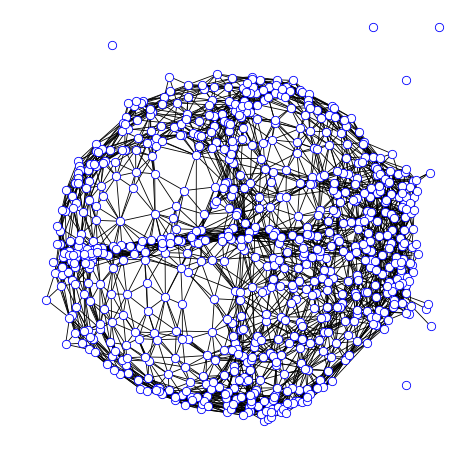

In [29]:
graph = nx.from_numpy_matrix(sample)
print_graph(G=graph)

## Print Original Adjacency Matrix
In this cell I am printing the original adjacency matrix, which reveals a weak bipartite property (chessboard pattern). It's interesting however, that we can observe that the lower right quardrant of the image is significantly more connected than the upper left quadrant. This would imply that one half of the brain has more intra connections than the other. Furthermore this adjacency matrix shows many strongly connected clusters along the diagonal. This implies that small clusters of neurons have far more intraconnections than interconnections.

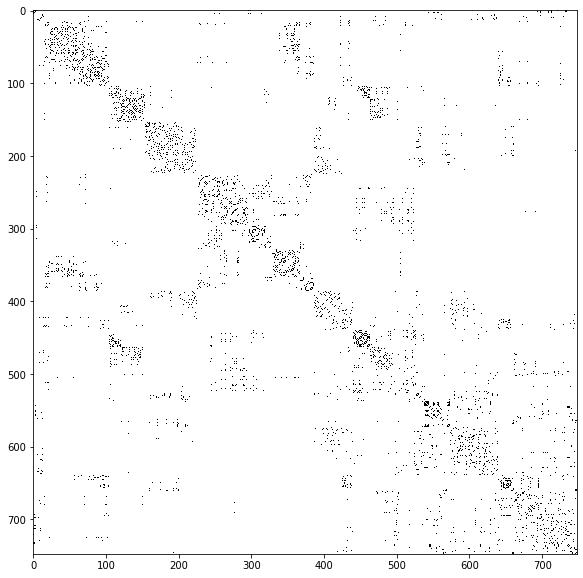

In [30]:
plt.subplots(figsize=(10, 10))
plt.imshow(sample, cmap='Greys', interpolation='none')
plt.show()

## Printing Degree Sorted Adjacency Matrix
In this cell I will print the adjacency matrix but sorted by the degree of the nodes.

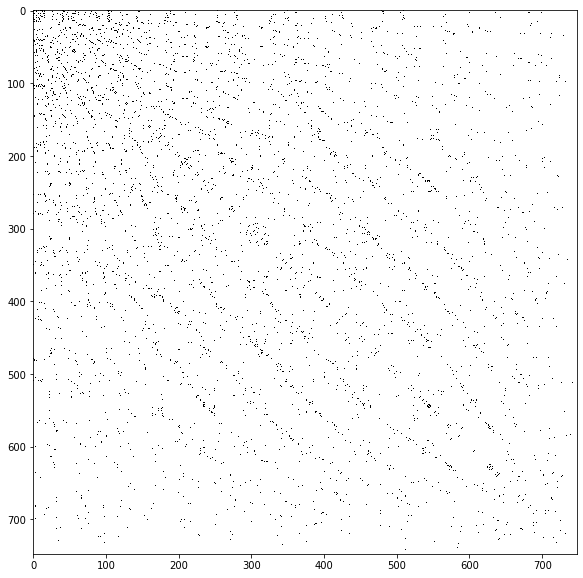

In [32]:
plt.subplots(figsize=(10, 10))
plt.imshow(nx.to_numpy_array(graph, nodelist=nodes_sorted_by_degree(graph)), cmap='Greys', interpolation='none')
plt.show()

## Using Seaborn Clustering
In the next cell I first shuffle the adjacency matrix and visualise that and then cluster it again using seaborn clustering algorithms. This reveals how seaborn can rediscover the bipartite property.

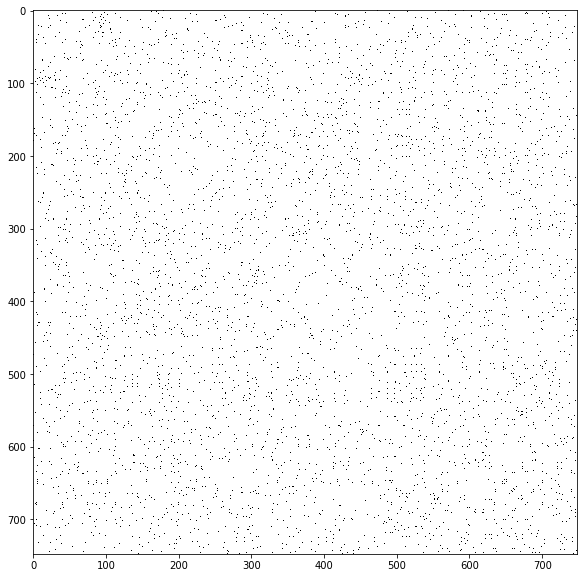

/Users/arnediehl/anaconda3/envs/master/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/arnediehl/anaconda3/envs/master/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


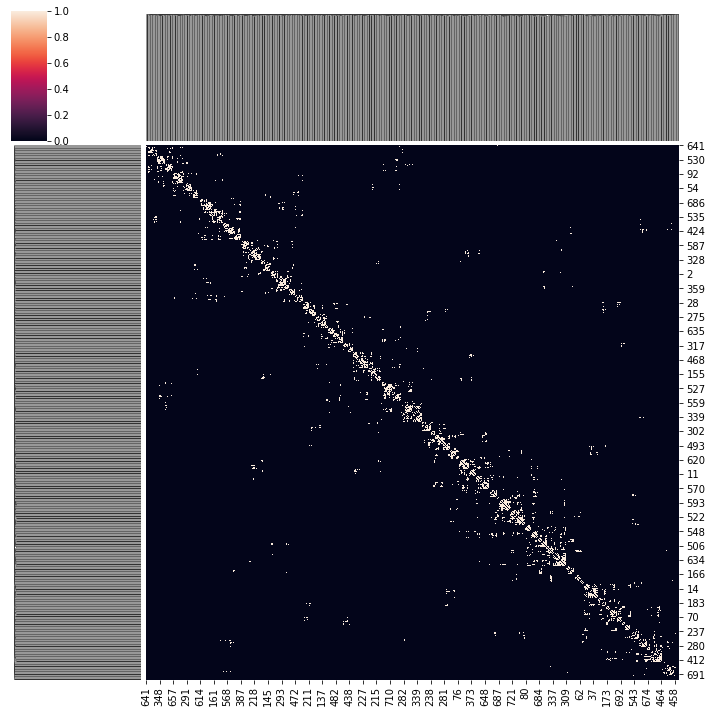

In [33]:
arr = deepcopy(sample)
_, new_arr = sort_matrix_by_indices(random.sample(list(range(len(arr))), k=len(arr)), arr)
plt.subplots(figsize=(10, 10))
plt.imshow(new_arr, cmap='Greys', interpolation='none')
plt.show()
sns.clustermap(new_arr, metric="russellrao")  # correlation, cosine, dice, jensenshannon, kulsinski, russellrao, yule
plt.show()